In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as mcolors
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
import datetime    #dateformatting
import time
import random
from sklearn.model_selection import RandomizedSearchCV   #For SVM model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR    #For SVM model
from sklearn.linear_model import LinearRegression
import operator
from mpl_toolkits.mplot3d import Axes3D 
from IPython.display import HTML
from matplotlib.pyplot import cm 

In [2]:
Confirmed_cases= pd.read_csv("time_series_covid19_confirmed_global.csv")
Deaths_cases= pd.read_csv("time_series_covid19_deaths_global.csv")
Recovered_cases=pd.read_csv("time_series_covid19_recovered_global.csv")


In [3]:
Confirmed_cases.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,665,714,784,840,906,933,996,1026,1092,1176
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,467,475,494,518,539,548,562,584,609,634
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,646,659,673,673,696,704,713,717,717,723
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,19,19,19,19,19,24,24,24,24,25


In [4]:
Confirmed_cases[Confirmed_cases['Country/Region']=='Pakistan']

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
177,NaN,Pakistan,30.3753,69.3451,0,0,0,0,0,0,...,5496,5837,6383,6919,7025,7638,8348,8418,9565,10076


In [5]:
Deaths_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,21,23,25,30,30,30,33,36,36,40
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,23,24,25,26,26,26,26,26,26,27
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,313,326,336,348,364,367,375,384,392,402
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,29,31,33,33,35,35,36,37,37,37
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [6]:
Recovered_cases.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,32,40,43,54,99,112,131,135,150,166
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,232,248,251,277,283,302,314,327,345,356
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,601,691,708,783,846,894,1047,1099,1152,1204
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,128,128,169,169,191,205,235,248,282,309
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,4,5,5,5,5,6,6,6,6,6


In [7]:
cols=Confirmed_cases.keys()
Confirmed= Confirmed_cases.loc[:,cols[4]:cols[-1]]   #Extracting only the date columns
Confirmed

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,0,0,0,0,0,0,0,0,0,0,...,665,714,784,840,906,933,996,1026,1092,1176
1,0,0,0,0,0,0,0,0,0,0,...,467,475,494,518,539,548,562,584,609,634
2,0,0,0,0,0,0,0,0,0,0,...,1983,2070,2160,2268,2418,2534,2629,2718,2811,2910
3,0,0,0,0,0,0,0,0,0,0,...,646,659,673,673,696,704,713,717,717,723
4,0,0,0,0,0,0,0,0,0,0,...,19,19,19,19,19,24,24,24,24,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
260,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
261,0,0,0,0,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,0,0,0,0,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4


In [8]:
Deaths= Deaths_cases.loc[:,cols[4]:cols[-1]]
Deaths

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,0,0,0,0,0,0,0,0,0,0,...,21,23,25,30,30,30,33,36,36,40
1,0,0,0,0,0,0,0,0,0,0,...,23,24,25,26,26,26,26,26,26,27
2,0,0,0,0,0,0,0,0,0,0,...,313,326,336,348,364,367,375,384,392,402
3,0,0,0,0,0,0,0,0,0,0,...,29,31,33,33,35,35,36,37,37,37
4,0,0,0,0,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
260,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
Recovered= Recovered_cases.loc[:,cols[4]:cols[-1]]
Recovered

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20
0,0,0,0,0,0,0,0,0,0,0,...,32,40,43,54,99,112,131,135,150,166
1,0,0,0,0,0,0,0,0,0,0,...,232,248,251,277,283,302,314,327,345,356
2,0,0,0,0,0,0,0,0,0,0,...,601,691,708,783,846,894,1047,1099,1152,1204
3,0,0,0,0,0,0,0,0,0,0,...,128,128,169,169,191,205,235,248,282,309
4,0,0,0,0,0,0,0,0,0,0,...,4,5,5,5,5,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
247,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
#calculating total confirm/death/recovered numbers w.r.t dates

dates=Confirmed.keys()   #datewise rows
world_cases=[]
total_deaths=[]
total_recovered=[]
mortality_rate=[]

#input is index, hence columnwise summation by sum
for i in dates:
    confirmed_sum=Confirmed[i].sum()   #columnwise sum
    deaths_sum=Deaths[i].sum()
    recovered_sum=Recovered[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(deaths_sum)
    total_recovered.append(recovered_sum)
    mortality_rate.append((deaths_sum/confirmed_sum)*100)
    
    


In [11]:
d = {'Date':dates,'Total cases':world_cases}
df = pd.DataFrame(d)

worldcases = df.style.background_gradient(cmap='Reds')
worldcases

,Date,Total cases
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118
5,1/27/20,2927
6,1/28/20,5578
7,1/29/20,6166
8,1/30/20,8234
9,1/31/20,9927


In [12]:
#reshaping lists dates/world cases/total deaths/recovered into arrays

days_since_1_22=np.array([i for i in range (len(dates))]).reshape(-1, 1) #reshape adjust array shape
world_cases= np.array(world_cases).reshape(-1, 1) 
total_deaths=np.array(total_deaths).reshape(-1,1)
total_recovered=np.array(total_recovered).reshape(-1,1)


In [13]:
#predicting cases for next 10 days

days_in_future=10
future_forecast=np.array([i for i in range (len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates=future_forecast[:-10]  #original dates in dataset


In [14]:
# changing format of dates

start='1/22/2020'
start_date= datetime.datetime.strptime(start,'%m/%d/%Y')
future_forecast_dates=[]
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))  

In [15]:
latest_confirmed =  Confirmed_cases[dates[-1]] 
latest_confirmed

0      1176
1       634
2      2910
3       723
4        25
       ... 
259       1
260       4
261       6
262       4
263       1
Name: 4/22/20, Length: 264, dtype: int64

In [16]:
latest_deaths =  Deaths_cases[dates[-1]] 
latest_deaths

0       40
1       27
2      402
3       37
4        2
      ... 
259      0
260      0
261      0
262      0
263      0
Name: 4/22/20, Length: 264, dtype: int64

In [17]:
latest_recovered =  Recovered_cases[dates[-1]] 
latest_recovered

0       166
1       356
2      1204
3       309
4         6
       ... 
245       0
246       0
247       0
248       0
249       0
Name: 4/22/20, Length: 250, dtype: int64

In [18]:
unique_countries=Confirmed_cases['Country/Region'].unique()

In [19]:
#countrywise cases sum

country_confirmed_cases=[]
no_cases=[]
for i in unique_countries:
    cases=latest_confirmed[Confirmed_cases['Country/Region']==i].sum()  #countrywise sum
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)    
        
for i in no_cases:
    unique_countries.remove(i)   #removing the countries with no cases     

In [20]:
#displaying total cases with respect to each country

d = {'Country':unique_countries,'Cases':country_confirmed_cases}
df = pd.DataFrame(d)
country_wise= df.sort_values(by=['Cases'],ascending=False)
pd.set_option("display.max_rows", None, "display.max_columns", None)

country_wise_display = country_wise.style.background_gradient(cmap='Reds')
country_wise_display

,Country,Cases
156,US,839675
138,Spain,208389
77,Italy,187327
56,France,157125
60,Germany,150648
154,United Kingdom,134638
150,Turkey,98674
73,Iran,85996
32,China,83868
124,Russia,57999


In [21]:
unique_provinces=list(Confirmed_cases['Province/State'].unique())
#unique_provinces

In [22]:
#latest_confirmed[Confirmed_cases['Country/Region']=='China'].sum()

In [23]:
#province wise cases sum

province_confirmed_cases=[]
no_cases=[]
for i in unique_provinces:
    cases=latest_confirmed[Confirmed_cases['Province/State']==i].sum()  
    if cases > 0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_provinces.remove(i)

In [24]:
#displaying total cases with respect to each province

d = {'Province':unique_provinces,'Cases':province_confirmed_cases}
df = pd.DataFrame(d)
Province_wise= df.sort_values(by=['Cases'],ascending=False)
pd.set_option("display.max_rows", None, "display.max_columns", None)

Province_wise_display = Province_wise.style.background_gradient(cmap='Reds')
Province_wise_display

,Province,Cases
31,Hubei,68128
16,Quebec,20965
14,Ontario,13718
8,Alberta,3401
1,New South Wales,2926
9,British Columbia,1795
23,Guangdong,1582
6,Victoria,1319
29,Henan,1276
50,Zhejiang,1268


In [25]:
#Data cleaning

nan=[]

for i in range (len(unique_provinces)):
    if type(unique_provinces[i])== float:
        nan.append(i)
        
for i in nan:
    unique_provinces.pop(i)       #pop used to delete specific index
    province_confirmed_cases.pop(i) 

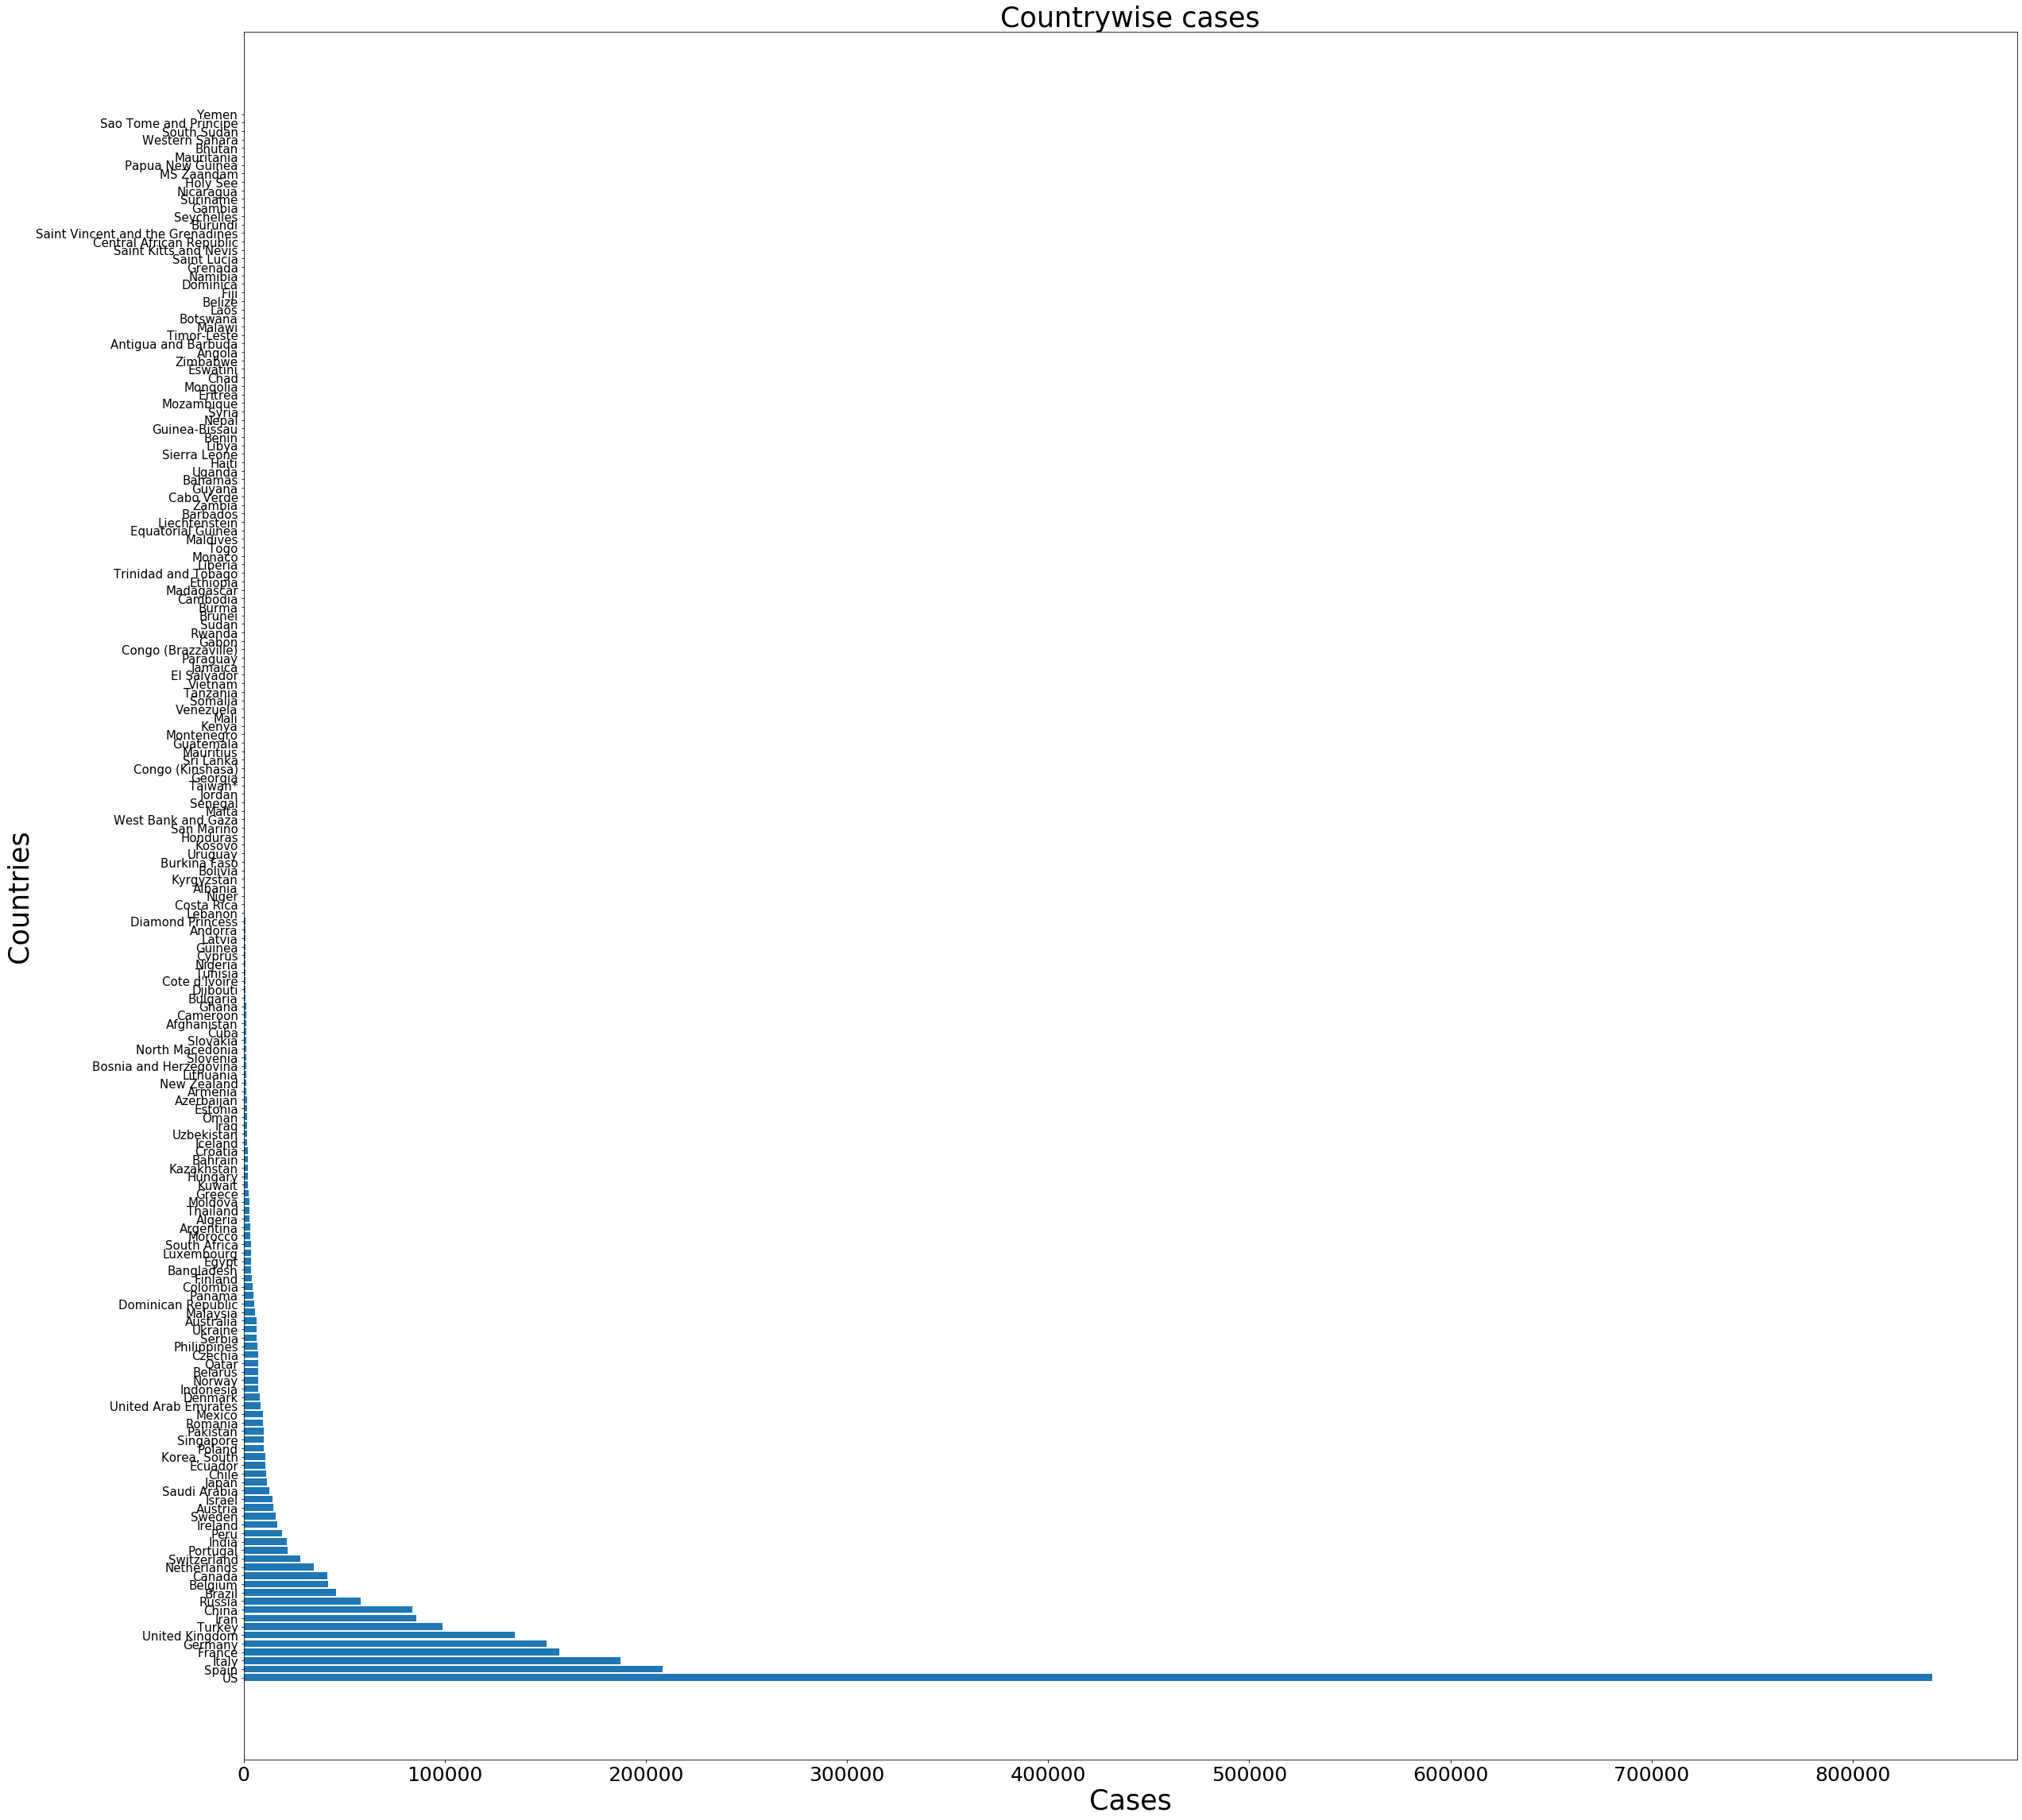

In [26]:
#countrywise cases

#different logic  as i sorted unqiue_countries and country_confirmed cases differently(as above)

temp_unique_countries=[]
temp_confirmed=[]

temp_unique_countries=country_wise['Country']
temp_confirmed_cases=country_wise['Cases']

plt.figure(figsize=(40,40))
plt.barh(temp_unique_countries,temp_confirmed_cases)
plt.xlabel('Cases',fontsize=35)
plt.ylabel('Countries',fontsize=35)
plt.xticks(fontsize=25)
plt.yticks(fontsize=15)
plt.title('Countrywise cases',fontsize=35)
plt.show()

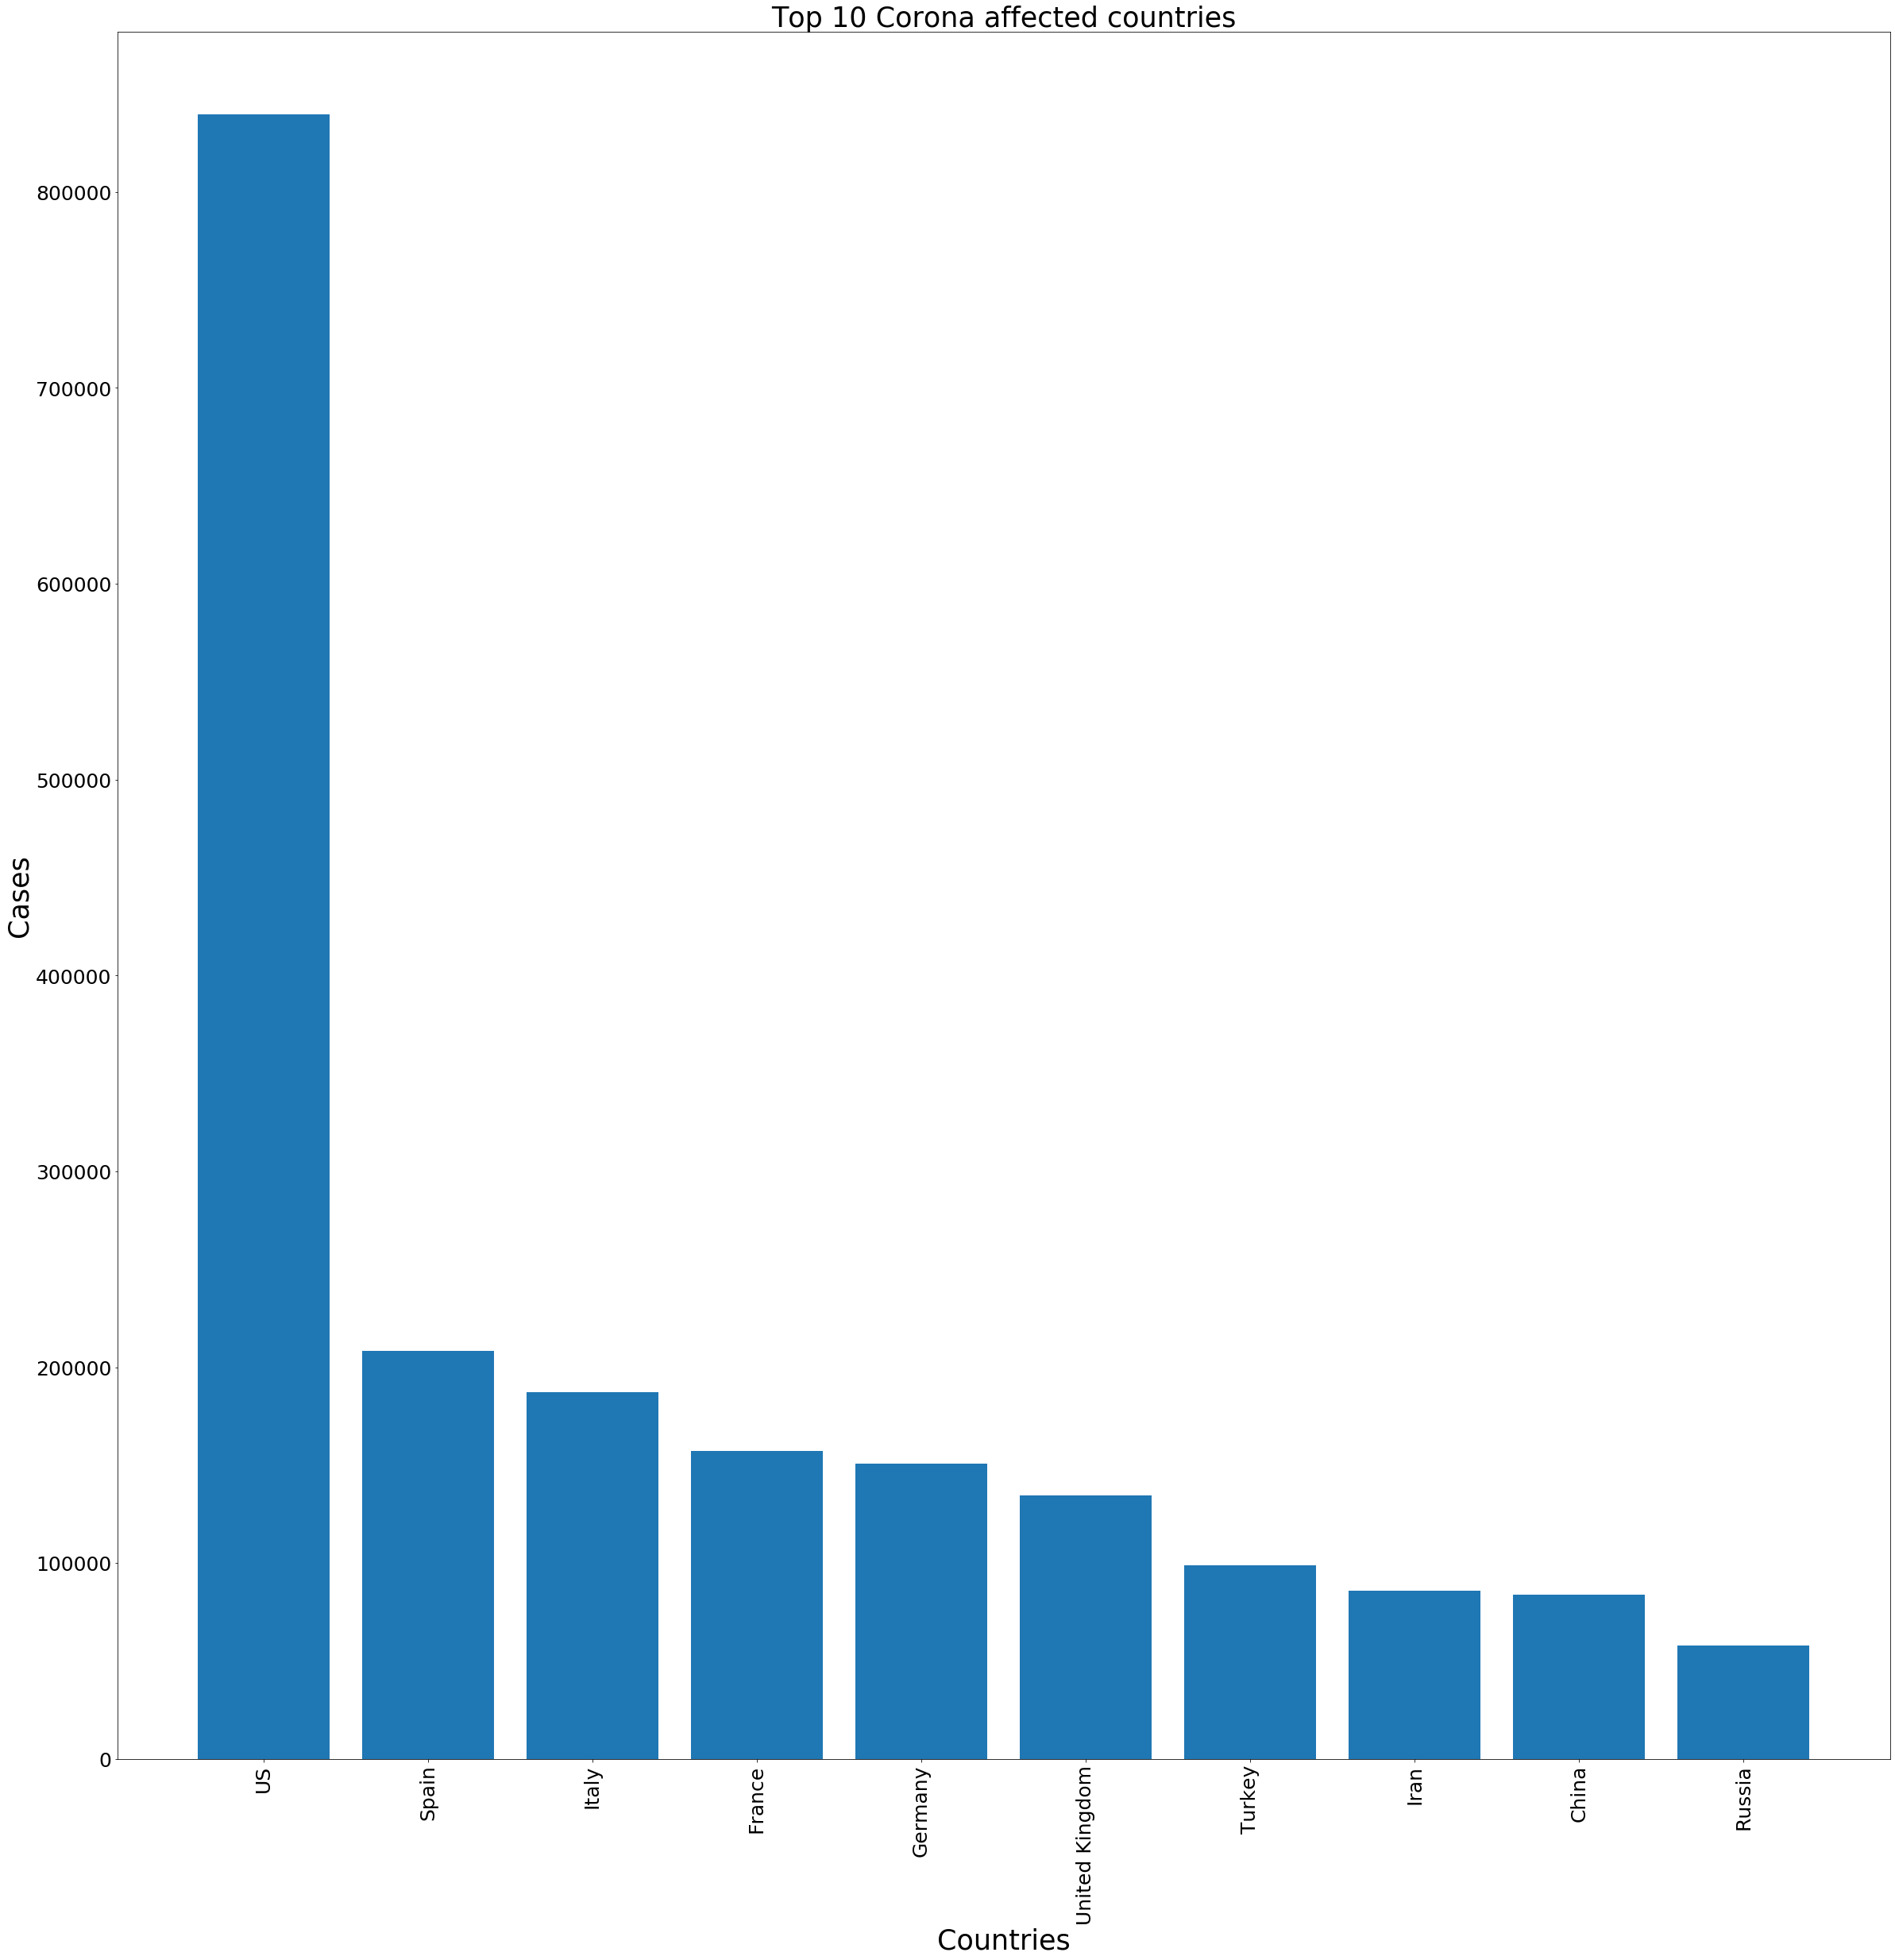

In [27]:
#visualizing top 10 countries with most cases

visual_unique_countries=country_wise[:10]['Country']
visual_confirmed_cases=country_wise[:10]['Cases']
others=country_wise[10:]


plt.figure(figsize=(40,40))
plt.bar(visual_unique_countries,visual_confirmed_cases)
plt.xlabel('Countries',fontsize=35)
plt.ylabel('Cases',fontsize=35)
plt.xticks(fontsize=25, rotation=90)
plt.yticks(fontsize=25)
#ax.tick_params(axis='both', which='major', labelsize=15)
plt.title('Top 10 Corona affected countries',fontsize=35)
plt.show()

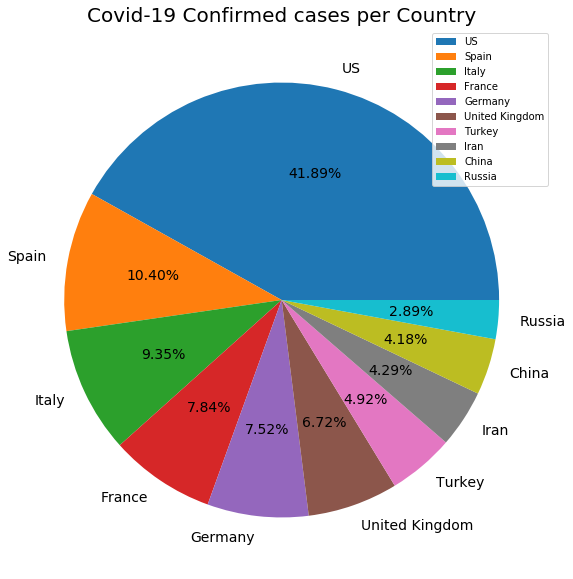

In [28]:
#confirmed cases pie chart in 10 different countries

c = sns.color_palette()
plt.figure(figsize=(10,10))
plt.title('Covid-19 Confirmed cases per Country', fontsize = 20)
plt.pie(visual_confirmed_cases, colors = c, labels = visual_unique_countries, autopct = '%.2f%%', textprops={'fontsize': 14})
plt.legend(visual_unique_countries, loc = 'best')
plt.show()

In [ ]:
from plotly.subplots import make_subplots

In [80]:
#world cases with respect to date
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.15, shuffle=False)

# Support Vector Machine Model

In [81]:
# Building the SVM Model

kernel = ['poly','sigmoid','rbf']
c = [0.01, 0.1, 1, 10]
gamma = [0.01, 0.1, 1]
epsilon = [0.01, 0.1, 1]
shrinking= [True, False]
svm_grid = {'kernel': kernel,'C': c,'gamma': gamma,'epsilon':epsilon,'shrinking':shrinking}

svm = SVR(kernel='poly')
svm_search = RandomizedSearchCV(svm, svm_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
svm_search.fit(X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  1.1min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                                 epsilon=0.1, gamma='auto_deprecated',
                                 kernel='poly', max_iter=-1, shrinking=True,
                                 tol=0.001, verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'C': [0.01, 0.1, 1, 10],
                                        'epsilon': [0.01, 0.1, 1],
                                        'gamma': [0.01, 0.1, 1],
                                        'kernel': ['poly', 'sigmoid', 'rbf'],
                                        'shrinking': [True, False]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [84]:
svm_search.best_params_

{'shrinking': True, 'kernel': 'poly', 'gamma': 1, 'epsilon': 0.01, 'C': 10}

In [85]:
svm_confirmed = svm_search.best_estimator_  #estimator is something that would give the highest score
svm_pred = svm_confirmed.predict(future_forecast)  #future forecast has 102 days
svm_pred = svm_pred.astype(int)

In [89]:
#svm_pred #values are predicted from day 1 till the future extra ten days

In [88]:
# Prediction for the next 10 days using SVM

print('SVM future predictions:')
set(zip(future_forecast_dates[-10:], svm_pred[-10:]))

SVM future predictions:


{('04/23/2020', 1910826),
 ('04/24/2020', 1973729),
 ('04/25/2020', 2038000),
 ('04/26/2020', 2103652),
 ('04/27/2020', 2170702),
 ('04/28/2020', 2239163),
 ('04/29/2020', 2309050),
 ('04/30/2020', 2380378),
 ('05/01/2020', 2453162),
 ('05/02/2020', 2527416)}

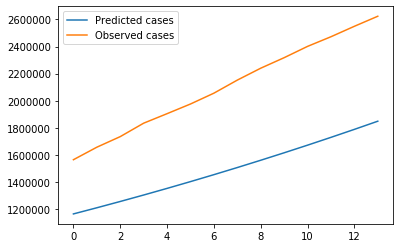

In [99]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(svm_test_pred, label = "Predicted cases")
plt.plot(y_test_confirmed, label = "Observed cases")
plt.legend()

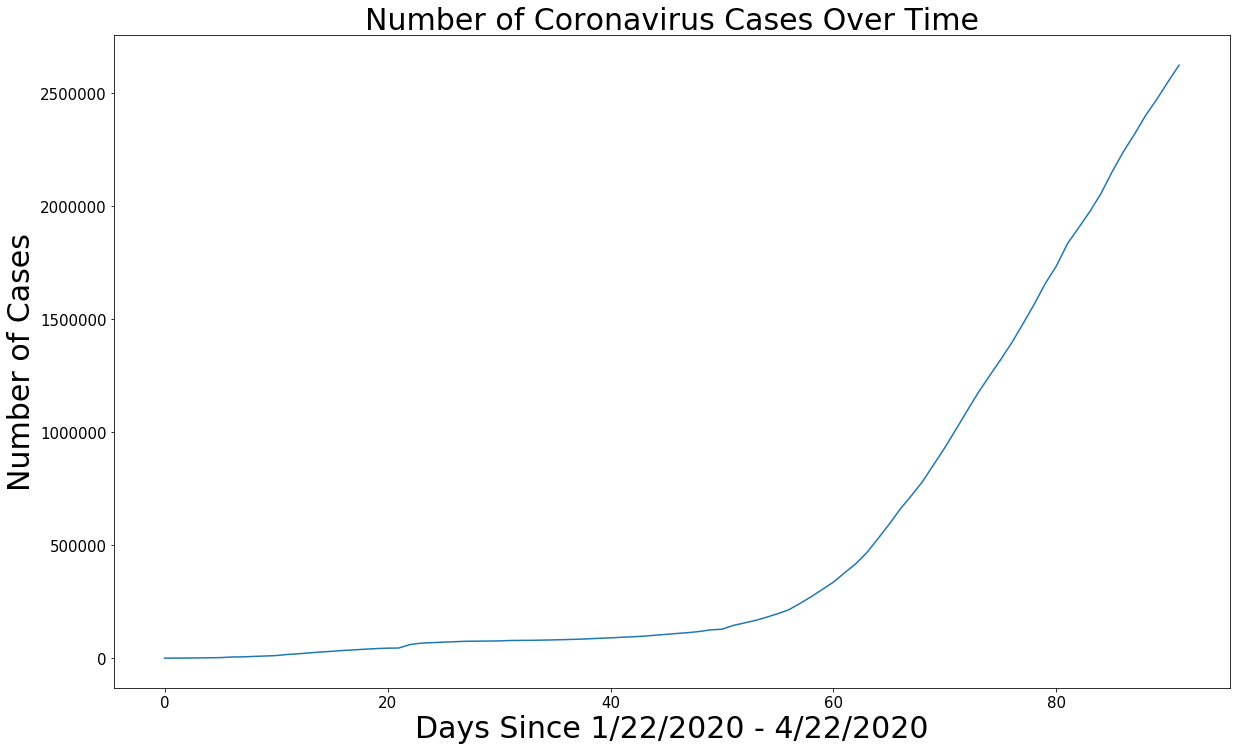

In [102]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020 - 4/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

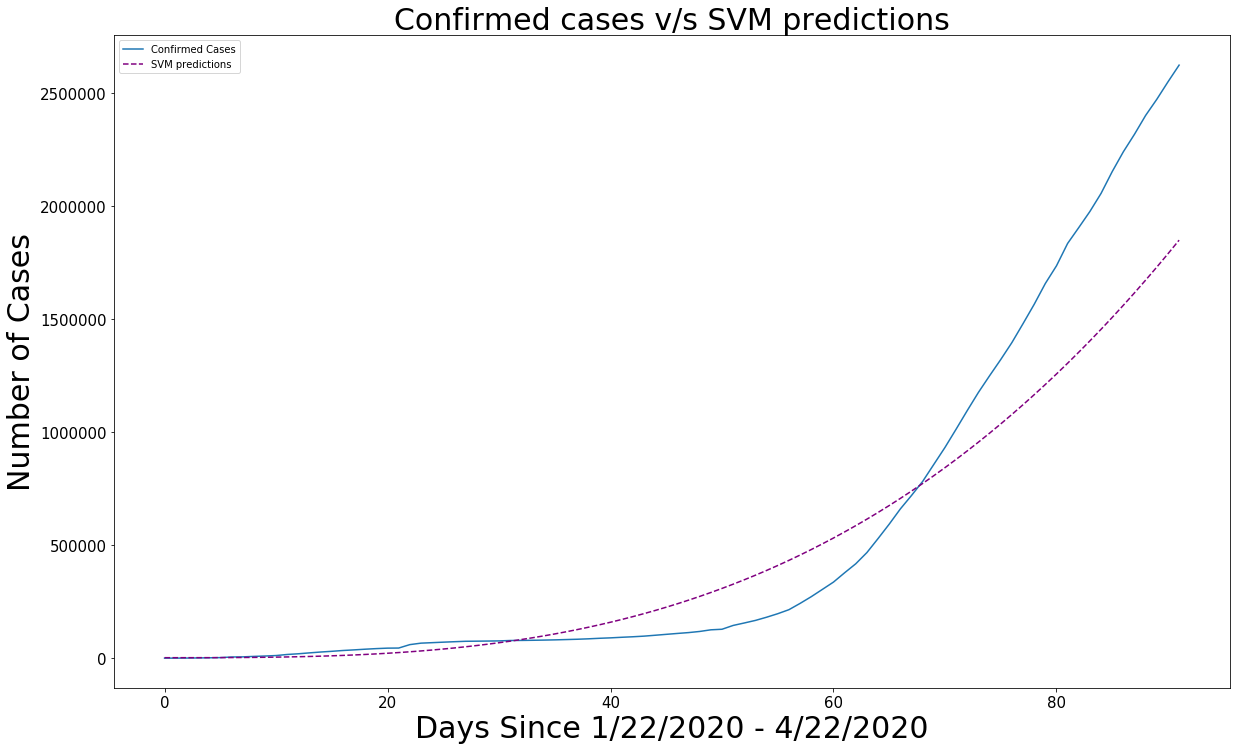

In [103]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast[:-10], svm_pred[:-10], linestyle='dashed', color='purple')
plt.title('Confirmed cases v/s SVM predictions', size=30)
plt.xlabel('Days Since 1/22/2020 - 4/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

# Linear Regression Model

In [117]:
# Using Linear Regression Model to make Predictions

linear_model = LinearRegression(normalize = True,fit_intercept = True)
linear_model.fit(X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(X_test_confirmed)
linear_pred = linear_model.predict(future_forecast)
linear_pred = linear_pred.astype(int)

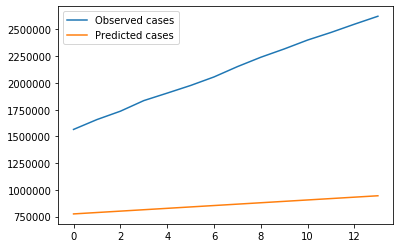

In [110]:
plt.plot(y_test_confirmed, label = "Observed cases")
plt.plot(test_linear_pred, label = "Predicted cases")
plt.legend()

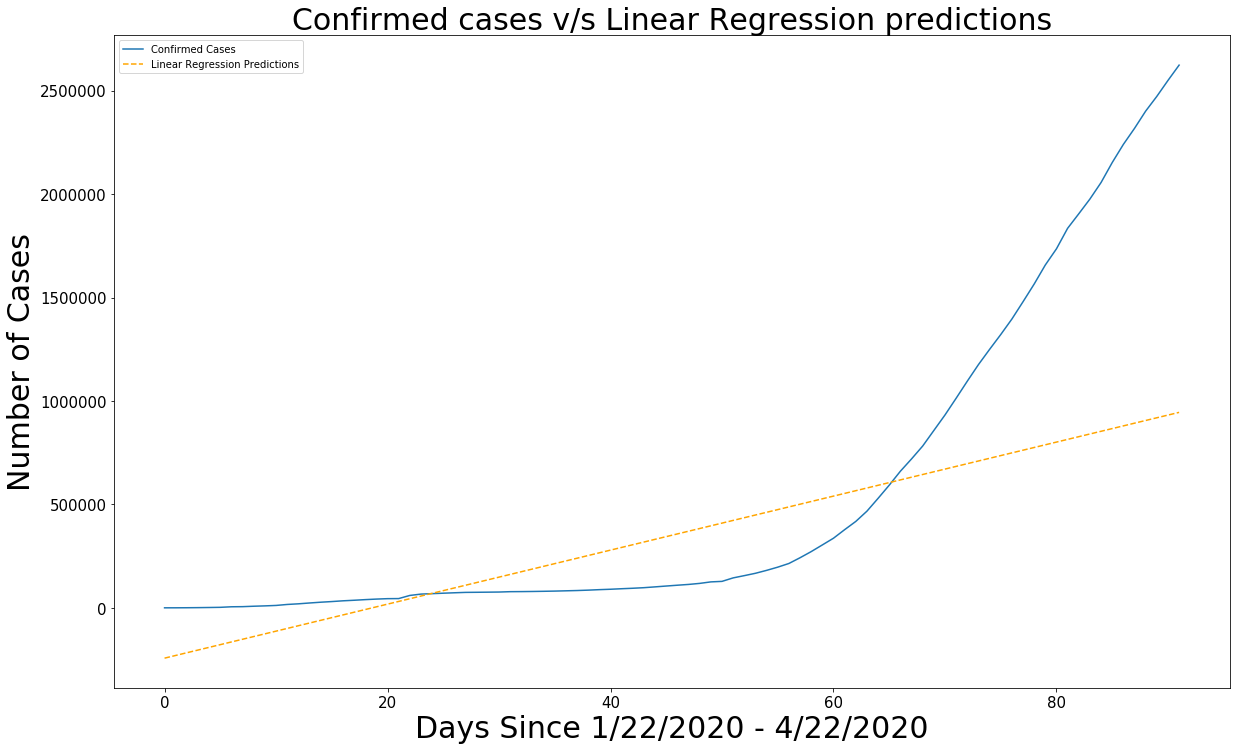

In [111]:
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forecast[:-10], linear_pred[:-10], linestyle='dashed', color='orange')
plt.title('Confirmed cases v/s Linear Regression predictions', size=30)
plt.xlabel('Days Since 1/22/2020 - 4/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['Confirmed Cases', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()

In [123]:
# Prediction for the next 10 days using Linear Regression
print('Linear regression future predictions:')
future_forecast_dates= np.array(future_forecast_dates).reshape(-1, 1)
set(zip(future_forecast_dates[-10:], linear_pred[-10:]))
#print(linear_pred[-10:])

Linear regression future predictions:


TypeError: unhashable type: 'numpy.ndarray'

(array([ 800000., 1000000., 1200000., 1400000., 1600000., 1800000.,
        2000000., 2200000., 2400000., 2600000., 2800000.]),
 <a list of 11 Text yticklabel objects>)

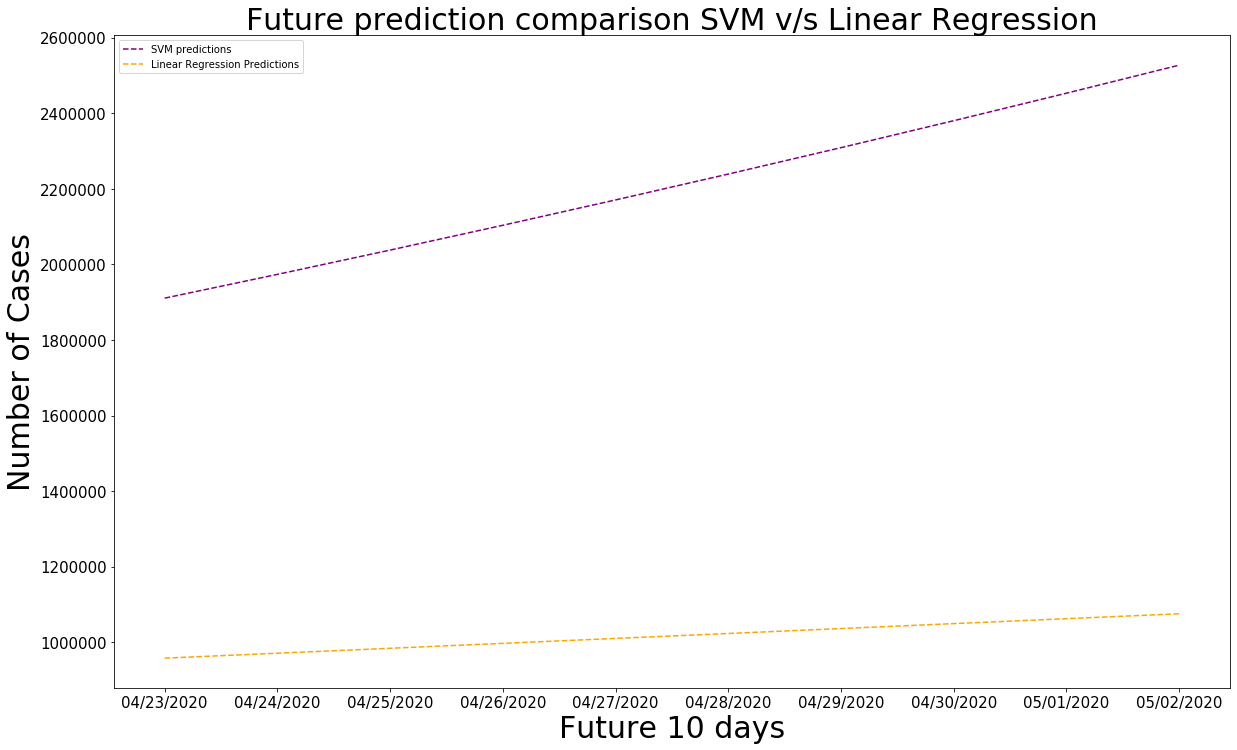

In [120]:
plt.figure(figsize=(20, 12))
plt.plot(future_forecast_dates[-10:], svm_pred[-10:], linestyle='dashed', color='purple')
plt.plot(future_forecast_dates[-10:], linear_pred[-10:], linestyle='dashed', color='orange')
plt.title('Future prediction comparison SVM v/s Linear Regression', size=30)
plt.xlabel('Future 10 days', size=30)
plt.ylabel('Number of Cases', size=30)
plt.legend(['SVM predictions', 'Linear Regression Predictions'])
plt.xticks(size=15)
plt.yticks(size=15)
#plt.show()

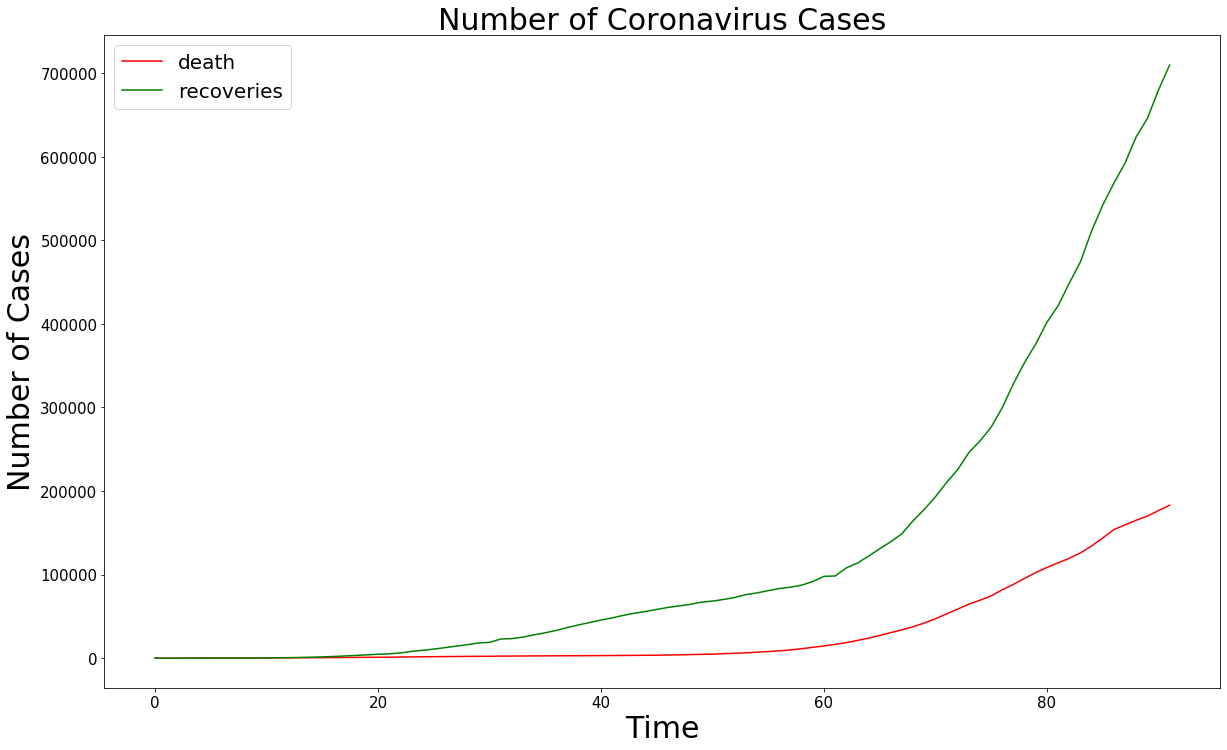

In [70]:
# Number of Coronavirus cases recovered vs the number of deaths
plt.figure(figsize=(20, 12))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('Number of Coronavirus Cases', size=30)
plt.xlabel('Time', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=15)
plt.yticks(size=15)
plt.show()